Introduction to Random Matrix Theory
---

In [1]:
import numpy as np
import pandas as pd
import numpy.random as rd
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
pd.core.common.is_list_like = pd.api.types.is_list_like
from datetime import datetime
%matplotlib inline
import yfinance as yf  

# Wigner Semicircle Law

Let $A$ be a matrix in $\mathcal{M}_{n,n}$ where each entry is an $\mathcal{N}(0,1)$ random variable. 
Define further the symmetric matrix 
$$
X:=\frac{1}{\sqrt{2n}}\left(A+A^\top\right).
$$
Being a real symmetric matrix of size $n$, $X$ admits $n$ distinct real eigenvalues $\lambda_1, \ldots, \lambda_n$

In [2]:
def wigner(x):  ## Wigner's semicircle density
    return np.sqrt(4.-x*x)/(2.*np.pi)

### Test on simulated data

C:\Users\Jacka\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


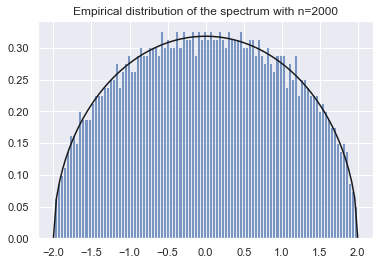

In [3]:
n = 2000
nbBins = 100
A = rd.normal(0.,1., [n,n])
X = (A + np.matrix.transpose(A)) / np.sqrt(2.*n)
lambdas = np.linalg.eigvals(X)
dataF = pd.DataFrame(lambdas, columns=['lambda'])

uu = np.linspace(-2., 2., nbBins)

plt.hist(dataF['lambda'], normed=True, alpha=0.7, bins=nbBins)
plt.plot(uu, wigner(uu), 'k')
plt.title("Empirical distribution of the spectrum with n=%s" %n)
plt.show()

# Marcenko-Pastur

### Marcenko-Pastur density

In [24]:
def marcPastur(x, q, sigma):
    lm, lp = (1.-np.sqrt(1./q))**2, (1.+np.sqrt(1./q))**2
    return q*np.sqrt((lp-x)*(x-lm))/(2.*np.pi*x*sigma*sigma)

### Test on simulated data

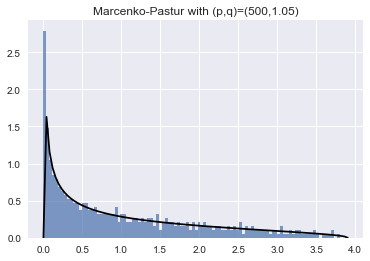

In [25]:
q=1.05
p = 500
n=int(q*p)

nbBins = 100
X = rd.normal(0.,1., [p,n])
Sigma = np.matmul(X,np.matrix.transpose(X))/n
lambdas = np.linalg.eigvals(Sigma)
dataF = pd.DataFrame(lambdas, columns=['lambda'])

lm, lp = (1.-np.sqrt(1./q))**2, (1.+np.sqrt(1./q))**2
uu = np.linspace(lm, lp, nbBins)

plt.hist(dataF['lambda'], normed=True, alpha=0.7, bins=nbBins)
plt.plot(uu, marcPastur(uu,q,1), 'k')
plt.title("Marcenko-Pastur with (p,q)=(%s,%s)" %(p,q))
plt.show()

# Test on SPX stocks

### List of YAHOO tickers

In [26]:
tickers = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 
           'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AAL', 'AEE', 'AEP', 
           'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 
           'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 
           'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 
           'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 
           'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 
           'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 
           'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN',
           'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 
           'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 
           'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV',
           'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM',
           'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 
           'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR',
           'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 
           'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LH', 'LRCX', 
           'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 
           'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 
           'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 
           'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 
           'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 
           'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 
           'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'REG', 'REGN', 'RF', 
           'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 
           'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 
           'SNPS', 'SYY', 'TROW', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TSS', 'TSCO', 
           'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 
           'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 
           'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 
           'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

### Import data

Select the number of stocks to pick in the S\&P 500

In [101]:
NbStocks = 200

In [93]:
from IPython.display import clear_output
data_source = 'yahoo'
start_day, end_day = '2017-01-01', '2018-01-01'

df = pd.DataFrame()

for i in range(NbStocks):
    ticker = tickers[i]
    try:
        dfTemp = yf.download(ticker,start_day, end_day)
        dfTemp = dfTemp.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
        dfTemp.columns=[ticker]
        if dfTemp[ticker].min()>0.:
            df = pd.concat([df, dfTemp], axis=1)
    except RemoteDataError: 
        print("Ticker ", ticker, " not available")
clear_output()
dr = df.dropna()

In [94]:
df.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,FRT,FDX,FIS,FITB,FE,FISV,FLIR,FLS,FLR,FMC
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,178.05,39.05,62.41,116.46,36.64,234.19,103.48,11.43,170.60,11.66,...,143.40,187.70,76.98,27.05,30.95,53.67,36.09,49.01,53.03,49.46
2017-01-04,178.32,39.36,63.29,116.74,37.36,239.93,104.14,11.43,172.00,11.56,...,144.22,188.71,78.24,27.42,30.97,54.33,36.60,49.56,53.83,50.49
2017-01-05,177.71,39.70,63.77,114.99,37.94,238.67,105.91,11.24,171.88,11.41,...,145.29,188.41,78.05,26.64,30.85,54.31,36.41,48.65,53.68,50.68
2017-01-06,178.23,40.78,63.79,116.30,37.91,237.36,108.30,11.32,169.63,11.82,...,144.49,190.25,78.89,26.87,31.13,54.92,35.92,48.86,53.22,50.58
2017-01-09,177.27,40.74,64.21,115.00,37.70,202.51,108.57,11.49,169.53,11.53,...,142.68,189.69,78.04,26.76,31.01,54.05,35.62,48.51,52.42,50.26


### Analysis of the data

#### Compute the log returns

In [95]:
log_returns = np.log(df).diff()
log_returns = log_returns.drop(df.index[0])
log_returns = (log_returns - log_returns.mean()) / np.sqrt(log_returns.var())
covMat = log_returns.cov()

#### Compute the Marcenko-Pastur quantities

In [96]:
p = len(log_returns.columns)
n = int(log_returns.count().mean())
q = 1.*n/p
print("Number of traded days (observations): ", n)
print("Number of stocks: ", p)
print("Marcenko-Pastur ratio: ", q)

Number of traded days (observations):  248
Number of stocks:  191
Marcenko-Pastur ratio:  1.2984293193717278


#### Heat map of the correlation matrix

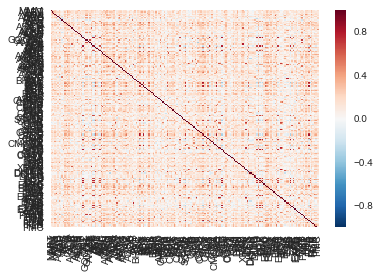

In [97]:
sns.heatmap(log_returns.corr());

#### Compute the eigenvalues

In [98]:
lambdas = np.linalg.eigvals(covMat)

### Compare the empirical distribution of the spectrum to the Marcenko-Pastur density

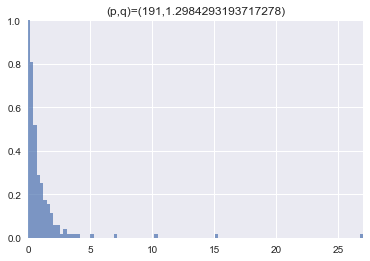

In [99]:
dataF = pd.DataFrame(lambdas, columns=['lambda'])

lm, lp = (1.-np.sqrt(1./q))**2, (1.+np.sqrt(1./q))**2
uu = np.linspace(lm, lp, nbBins)

plt.hist(dataF['lambda'], normed=True, alpha=0.7, bins=nbBins)
plt.title("(p,q)=(%s,%s)" %(p,q))
plt.axis([0., np.max(lambdas), 0., 1.])
plt.show()

#### Removing the top eigenvalues

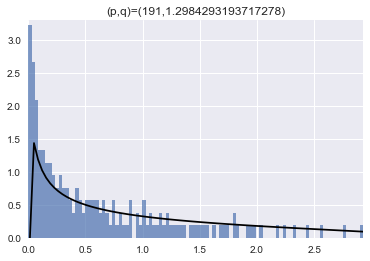

In [100]:
lambdaSub = np.sort(lambdas)[1:-10]
dataF = pd.DataFrame(lambdaSub, columns=['lambda'])

lm, lp = (1.-np.sqrt(1./q))**2, (1.+np.sqrt(1./q))**2
uu = np.linspace(lm, lp, nbBins)

plt.hist(dataF['lambda'], normed=True, alpha=0.7, bins=nbBins)
plt.plot(uu, marcPastur(uu,q,1), 'k', label="Marcenko-Pastur")
plt.title("(p,q)=(%s,%s)" %(p,q))
plt.axis([0., np.max(lambdaSub), 0., 3.3])
plt.show()